In [59]:
import matplotlib.pyplot as plt
import seaborn as sns;
import torch
import numpy as np
import pandas as pd

from kmeans_pytorch import kmeans
#! pip install kmeans-pytorch

#### K-Means Clustering

In [65]:
def customer_clustering(customer_embed, num_clusters, name_path):
    data_size, dims = customer_embed.size(0), cust_embed.size(1)

    cluster_ids_x, cluster_centers = kmeans(
        X=customer_embed, num_clusters=num_clusters, distance='cosine', device=torch.device('cuda:1')) # 'euclidean', 'cosine'
    plt.figure(figsize=(7, 3))
    plt.bar(list(range(num_clusters)), pd.Series(cluster_ids_x.cpu().numpy()).value_counts().sort_index())
    pd.DataFrame({'Index_Customer': list(range(data_size)), 'Cluster': cluster_ids_x}).to_csv(name_path+'clustering.csv')
    plt.show()
    return cluster_ids_x, cluster_centers

#### Count Purshase by Category and Count Purshase by Category
#### SHOP_UNIQUE

In [103]:
def distr_category(cluster_ids_x, data, name_path):
    sns.set(rc={'figure.figsize':(15,20)})
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    # plt.rcParams["figure.autolayout"] = True

# gridspec_kw=dict(width_ratios=[40], height_ratios=[40,40,40])
    fig, axs = plt.subplots(nrows=3)
    fig.subplots_adjust(wspace=0.01)

    clustering = pd.DataFrame(columns = ['head', 'cluster'])
    clustering['head'] = list(range(len(cluster_ids_x)))
    clustering['cluster'] = [str(int(i)) for i in cluster_ids_x]
    df = pd.merge(data, clustering, how='left', on='head')
    
    mean_cluster_category = pd.DataFrame(index = df['tail_type'].unique())

    for i in np.sort(df.cluster.unique()):
        temp = pd.Series(df[df.cluster == i]['tail_type'].value_counts().sort_index(), name=i)
        mean_cluster_category = pd.merge(mean_cluster_category, temp, left_index=True, right_index=True, how = 'left')
    
    # display(mean_cluster_category)
    # vmin = min(mean_cluster_category.min())
    mean_cluster_category_norm = mean_cluster_category.div(mean_cluster_category.sum(axis=1), axis=0)
    sns.heatmap(mean_cluster_category_norm, ax=axs[0], annot = True, fmt='.2f')
    axs[0].set_title('Number of purchases')
    
    df2 = pd.Series(list(df['relation']), index=[df['cluster'], df['tail_type']])
    mean_cluster_amount = pd.DataFrame(index = df['tail_type'].unique())

    for i in np.sort(df.cluster.unique()):
        temp = pd.Series(df2[i].groupby('tail_type').sum().sort_index(), name=i)
        mean_cluster_amount = pd.merge(mean_cluster_amount, temp, left_index=True, right_index=True, how = 'left')
    
    mean_cluster_amount.loc['Total',:]= mean_cluster_amount.sum(axis=0)
    # display(mean_cluster_amount)
    mean_cluster_amount_norm = mean_cluster_amount.div(mean_cluster_amount.sum(axis=1), axis=0)
    sns.heatmap(mean_cluster_amount_norm, ax=axs[1], annot = True, fmt='.2f')
    axs[1].set_title('Amount of purchases')

    shop_unique = pd.DataFrame()
    df11 = pd.DataFrame(df['tail'].groupby([df['cluster'],df['head']]).nunique()).reset_index()

    # shop_unique['cluster'] = list(range(10))
    shop_unique['min'] = list(df11['tail'].groupby([df11['cluster']]).min())
    shop_unique['max'] = list(df11['tail'].groupby([df11['cluster']]).max())
    shop_unique['mean'] = list(df11['tail'].groupby([df11['cluster']]).mean())
    # display(shop_unique)
    sns.heatmap(shop_unique, ax=axs[2],  vmin = -100, annot = True, fmt='.0f')
    
    mean_cluster_category.to_csv(name_path + 'Count_purchase.csv')
    mean_cluster_amount.to_csv(name_path + 'Amount_purchase.csv')
    mean_cluster_amount.to_csv(name_path + 'Shop_unique.csv')
    
    fig.subplots_adjust(wspace=0.001)
    plt.show()
    return mean_cluster_category, mean_cluster_amount

In [105]:
NUM_CLUSTERS = 7

running k-means on cuda:1..


[running kmeans]: 44it [00:00, 120.38it/s, center_shift=0.000038, iteration=44, tol=0.000100]


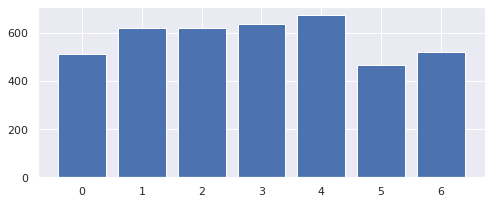

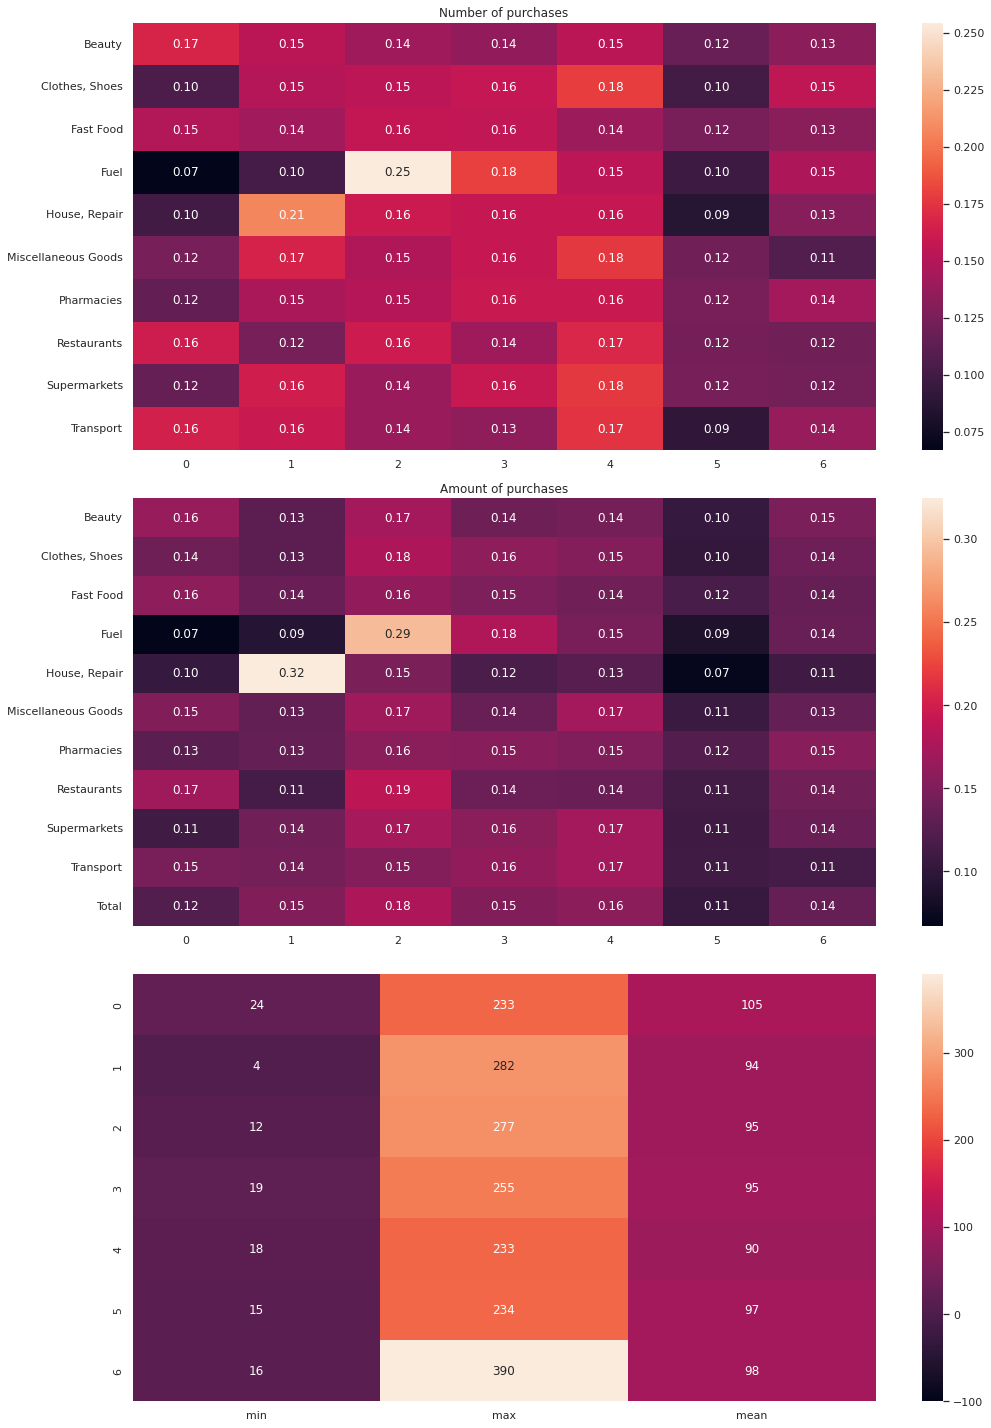

In [106]:
NAME_PATH = 'log//RES_100_8//ComplEx//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]


cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 61it [00:00, 83.06it/s, center_shift=0.000095, iteration=61, tol=0.000100] 


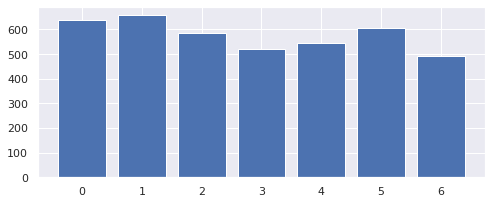

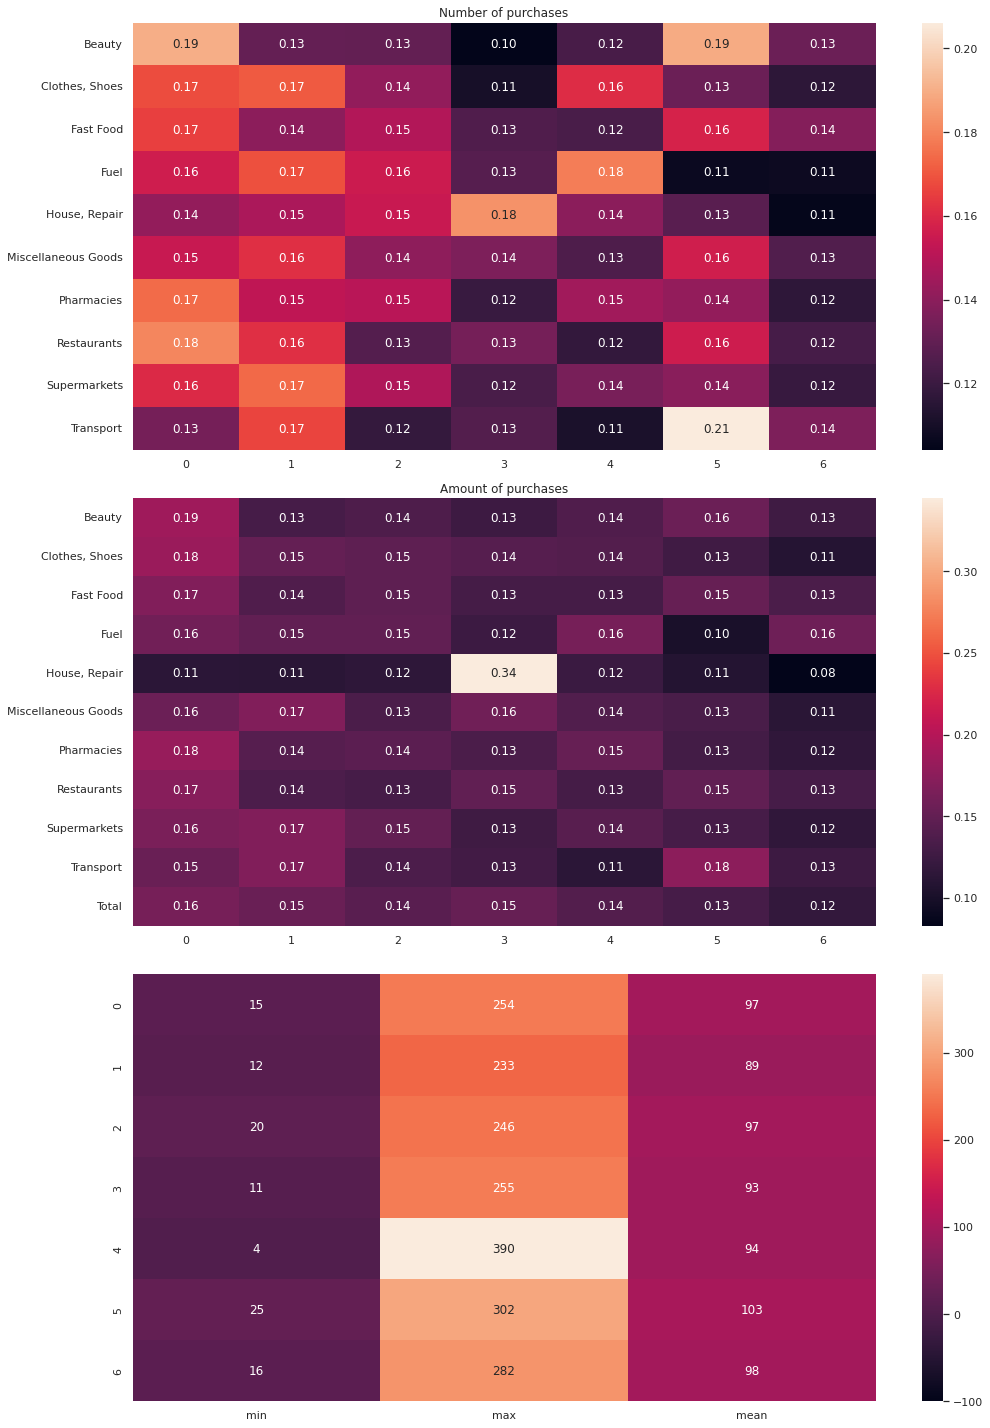

In [107]:
NAME_PATH = 'log//RES_100_8//DistMult//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 35it [00:00, 101.88it/s, center_shift=0.000000, iteration=35, tol=0.000100]


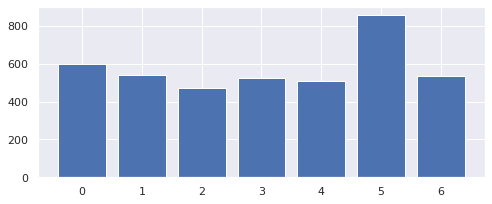

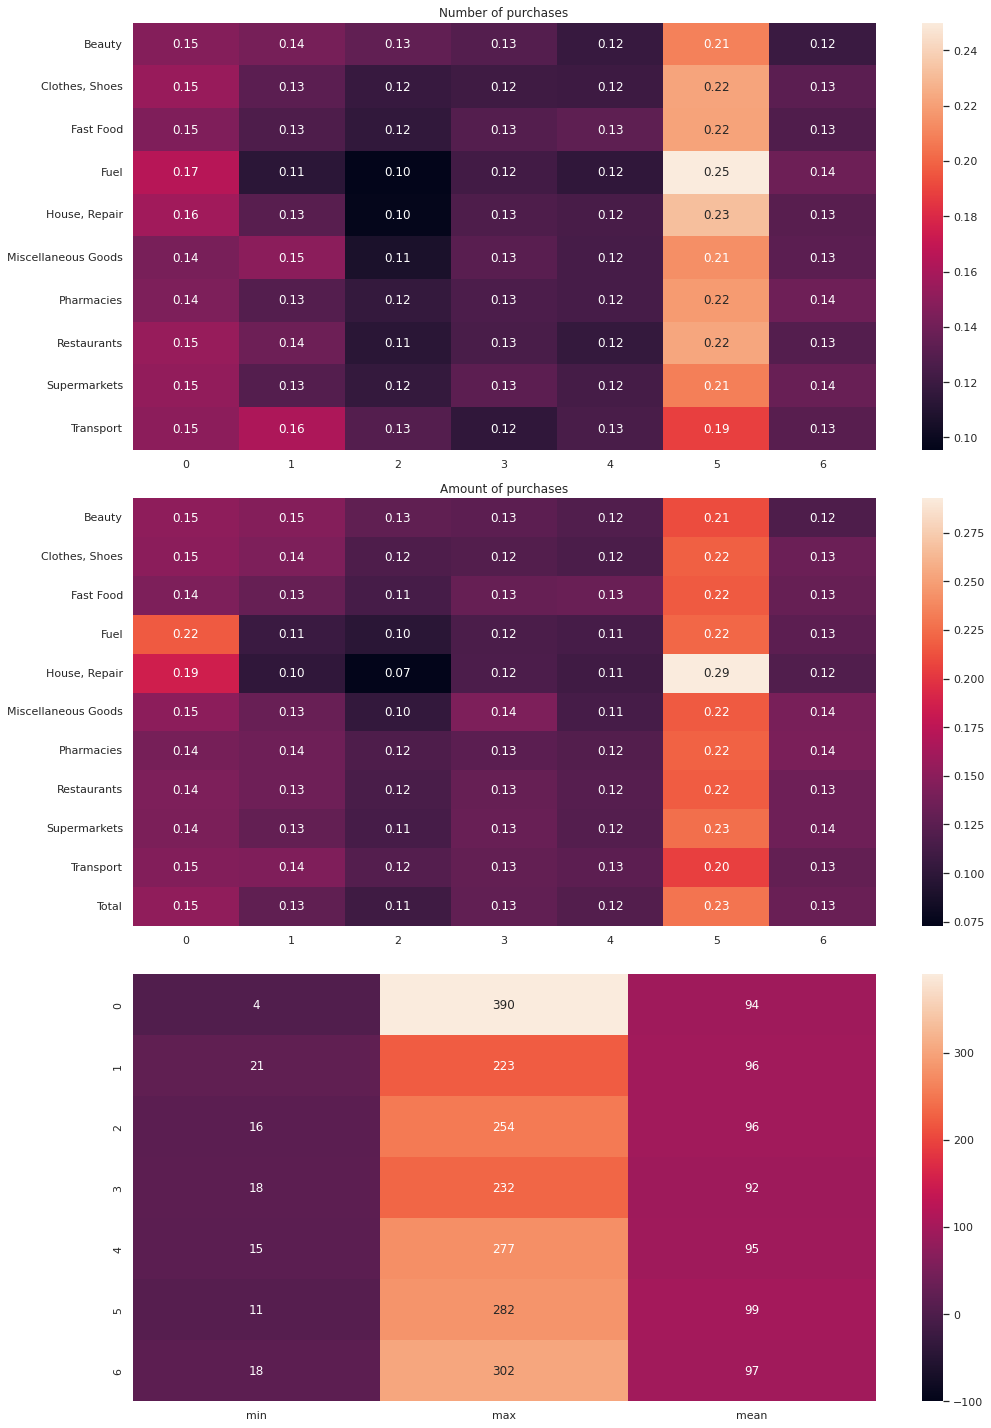

In [108]:
NAME_PATH = 'log//RES_100_8//RotatE//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 89it [00:01, 84.86it/s, center_shift=0.000014, iteration=89, tol=0.000100] 


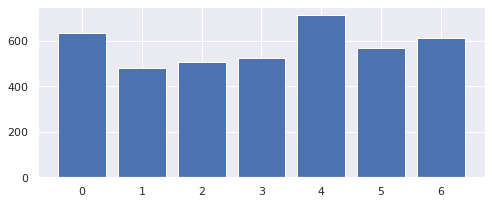

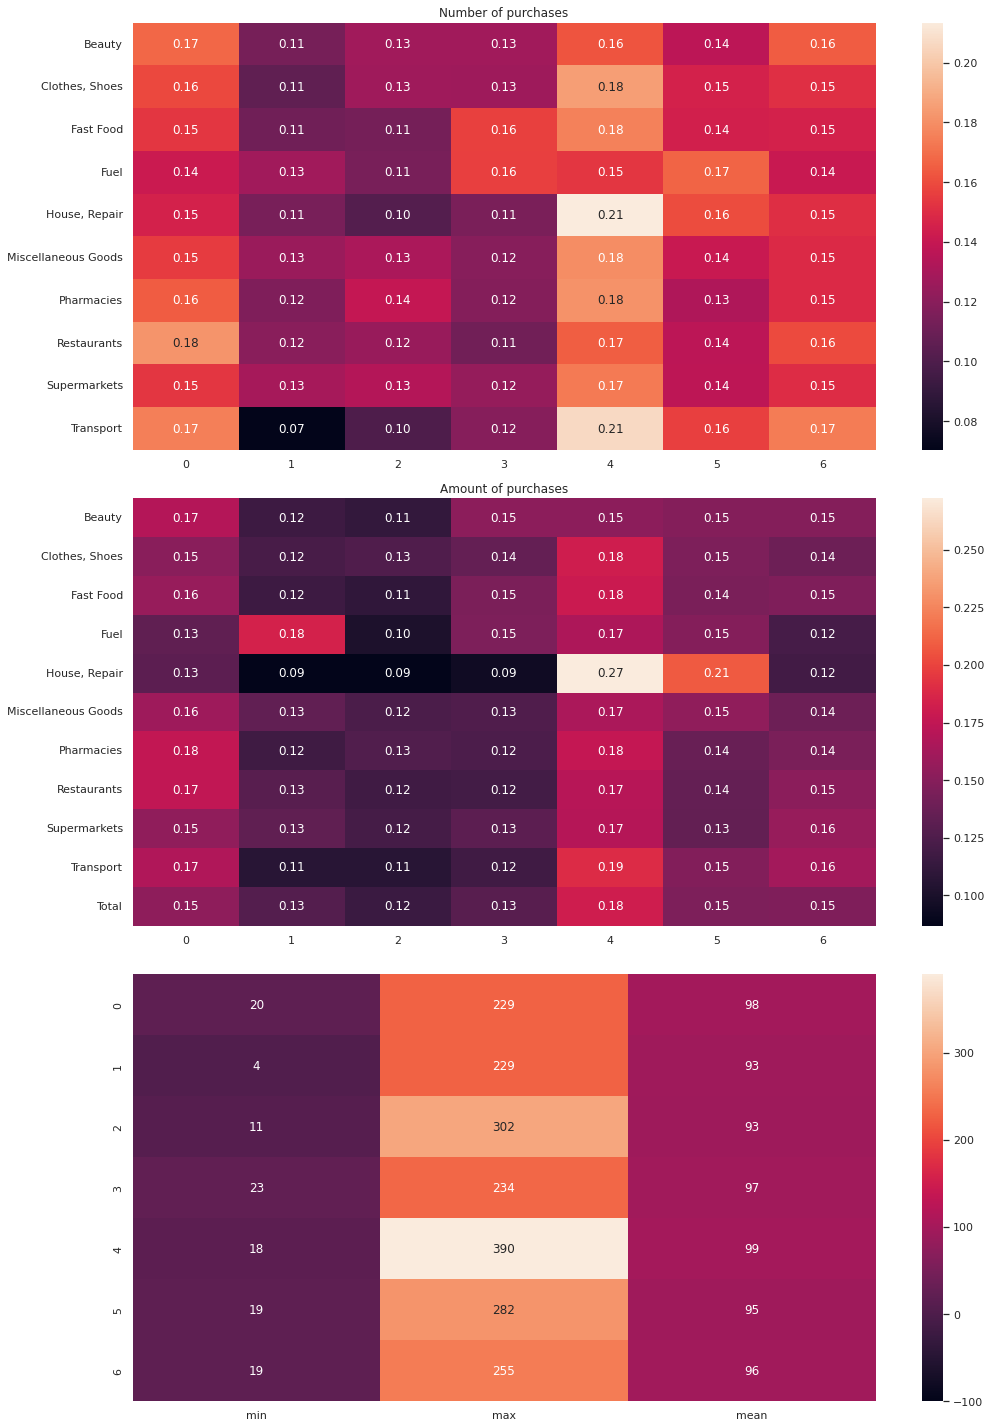

In [109]:
NAME_PATH = 'log//RES_100_8//TransE//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)